In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import sys

In [2]:
number_of_runs = 10
project_path = '/Users/cc/Dropbox/2D_Stik_Slip/2D_slip_distribution_analysis/'
ref_path = 'Ref/'
## slip diagnostic paramer ##
velThreshold = 0.001
avg_window = 30
avg_window_short = 300

start_frame = 0
end_frame = 149999
min_slip_interval = 100

# Old method to find the begin and end time

In [22]:
#read ref size system data
slip_size_reference = []#initiate the slip
for i in range(number_of_runs):
    file_name = ("wallinfo_%d.dat")%(i+1)
    fullpath = project_path + ref_path + file_name
    df_wallinfo_reference = pd.read_csv(fullpath, skiprows=1,header = None, sep='\s+')
    df_wallinfo_reference.columns = ["Frame","Xperiodic", "YPosition","XVelocity","YVelocity","XPosition",
                                     "TopForceX","TopForceY","BottomForceX", "BottomForceY","Springforce"]
    counter = 0
    slip_frame_reference = []
    last_slip_event = 0
    for idx in range(start_frame + avg_window, end_frame):
        current_frame = idx
        vel_current = df_wallinfo_reference.loc[idx,['XVelocity']].values
        if ((vel_current > velThreshold) & (idx - last_slip_event > min_slip_interval) ):
            vel_former_mean=df_wallinfo_reference.loc[range(idx-avg_window,idx),['XVelocity']].mean().values
            vel_later_mean=df_wallinfo_reference.loc[range(idx+1,idx+avg_window+1),['XVelocity']].mean().values  
            if (vel_former_mean < velThreshold) & (vel_later_mean > velThreshold):
                slip_frame_reference.append(idx)
                last_slip_event = idx
                counter = counter + 1
    K = 1 #step increment
    for idx,item in enumerate(slip_frame_reference):  
        slip_time = item
        endtime = slip_time
        startPosition = df_wallinfo_reference.loc[[item],['XPosition']].values
        newPosition = startPosition
        deltaPosition = startPosition
        while abs(deltaPosition) >= 0.005:
            endtime = endtime + K
            if endtime <= end_frame:
                deltaPosition = df_wallinfo_reference.loc[[endtime],['XPosition']].values - newPosition
                newPosition = df_wallinfo_reference.loc[[endtime],['XPosition']].values
            else:
                break
        slip_size_reference.append(newPosition-startPosition)
np.savetxt((project_path + ref_path + "slip_size_reference.csv"), 
           np.array(slip_size_reference).flatten(), delimiter=",")

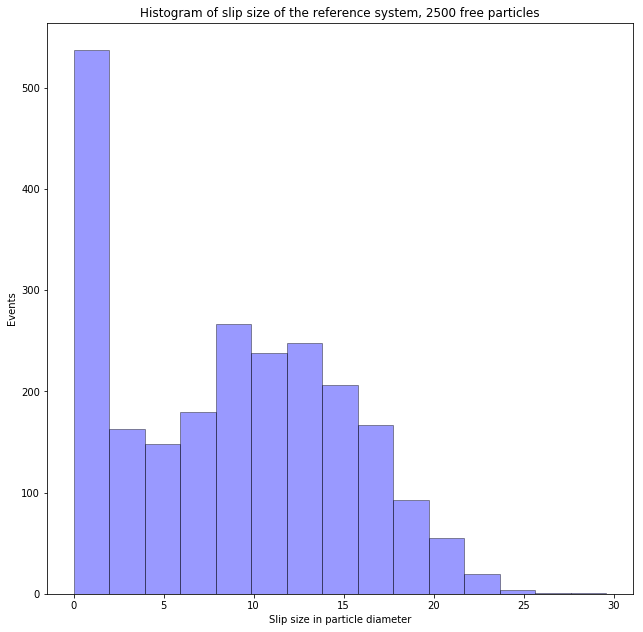

In [31]:
# seaborn histogram
# Whether to plot a gaussian kernel density estimate, KDE
sns.distplot(slip_size_reference, hist=True, kde=False, 
             bins=15,  color = 'blue',
             hist_kws={'edgecolor':'black'},)
            #kde_kws={"color": "R", "lw": 3, "label": "Gaussian Kernel Density Estimate"})

plt.title('Histogram of slip size of the reference system, 2500 free particles')
plt.xlabel('Slip size in particle diameter')
plt.ylabel('Events')
fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
fig.savefig(project_path + ref_path +"distribution_reference.png" , dpi=200)

# read ls data and wall data

In [29]:
df_wallinfo_reference = pd.read_csv(project_path + ref_path +'wallinfo_reference.dat', skiprows=1, 
                              header = None, sep='\s+')
df_wallinfo_reference.columns = ["Frame","Xperiodic", "YPosition","XVelocity","YVelocity","XPosition",
                           "TopForceX","TopForceY","BottomForceX", "BottomForceY","Springforce"]

df_wallinfo_reference_long = pd.read_csv(project_path + ref_path +'wallinfo_reference_10th.dat', 
                              header = None, sep='\s+')
df_wallinfo_reference_long.columns = ["Frame","Xperiodic", "YPosition","XVelocity","YVelocity","XPosition",
                           "TopForceX","TopForceY","BottomForceX", "BottomForceY","Springforce"]

l_span_dir = project_path + ref_path + 'ls_data/'
l_span_long_dir = project_path + ref_path + 'ls_data_long/'
ls = []
ls_long = []
for i in range(4):# 4 regions of ls
    ls_df = pd.read_csv((l_span_dir+'B0/ls_%d.txt')%(i+1),header = None, sep='\s+')  
    ls_df_long = pd.read_csv((l_span_long_dir+'B0/ls_%d.txt')%(i+1),header = None, sep='\s+')
    ls.append(ls_df.values.tolist()) 
    ls_long = ls_df_long.values.tolist()
ls = np.array(ls)
ls_long = np.array(ls_long)

# old method for the short run with high output frequency

In [1]:
# counter = 0
# slip_frame_reference = []
# slip_size_reference = []
# ls_change = []
# last_slip_event = 0
# start_frame = 0
# end_frame = 299999
# velThreshold = 0.001
# avg_window_short = 300
# min_slip_interval = 100
# for idx in range(start_frame + avg_window_short, end_frame):
#     current_frame = idx
#     vel_current = df_wallinfo_reference.loc[idx,['XVelocity']].values
#     if((vel_current > velThreshold) & (idx - last_slip_event > min_slip_interval)):
#         vel_former_mean=df_wallinfo_reference.loc[range(idx-avg_window_short,idx),['XVelocity']].mean().values
#         vel_later_mean=df_wallinfo_reference.loc[range(idx+1,idx+avg_window_short+1),['XVelocity']].mean().values  
#         if(vel_former_mean < velThreshold) & (vel_later_mean > velThreshold):
#                 slip_frame_reference.append(idx)
#                 last_slip_event = idx
#                 counter = counter + 1
                
# K = 10 #step increment
# for idx,item in enumerate(slip_frame_reference):  
#     slip_time = item
#     endtime = slip_time
#     startPosition = df_wallinfo_reference.loc[[item],['XPosition']].values
#     newPosition = startPosition
#     deltaPosition = startPosition
#     while abs(deltaPosition) >= 0.005:
#         endtime = endtime + K
#         if endtime <= end_frame:
#             deltaPosition = df_wallinfo_reference.loc[[endtime],['XPosition']].values - newPosition
#             newPosition = df_wallinfo_reference.loc[[endtime],['XPosition']].values
#         else:
#             break
#     slip_size_reference.append(newPosition - startPosition)
#     ls_changes_reg = []
#     for i in range(4):
#         ls_changes_reg.append(ls[i, endtime] - ls[i, slip_time])
#     ls_change.append(np.array(ls_changes_reg).flatten().tolist())
    
# np.savetxt((project_path + ref_path + "slip_size_ref_short.csv"), 
#            np.array(slip_size_reference).flatten(), delimiter=",")
# np.savetxt((project_path + ref_path + "ls_changes_ref_short.csv"), 
#            np.array(ls_change), delimiter=",")

In [2]:
# print(counter)

In [ ]:
# small_count = 0
# large_count = 0
# small_pos_count = np.array([0,0,0,0]) #if ls becomes bigger after slip event, it is counted
# large_pos_count = np.array([0,0,0,0]) #if ls becomes bigger after slip event, it is counted
# ls_change = np.array(ls_change)
# for i, item in enumerate(slip_size_reference):
#     ls_small_reg = []
#     ls_large_reg = []
    
#     if item <= 3.0:
#         small_count = small_count + 1
#         for j in range(4):
#             if ls_change[i,j] >= 0.0:
#                 small_pos_count[j] = small_pos_count[j] + 1       
#     else:
#         large_count = large_count + 1
#         for j in range(4):
#             if ls_change[i,j] >= 0.0:
#                 large_pos_count[j] = large_pos_count[j] + 1 
# print(small_count)
# print(small_pos_count)

# print(large_count)
# print(large_pos_count)

In [4]:
# labels = ['LS1', 'LS2', 'LS3', 'LS4']
# short_total = 62
# short_small = 12
# short_large = 50
# ls_short_large = np.around(np.array([30,24,23,16])/short_large,2)
# ls_short_small = np.around(np.array([6, 5, 5, 7])/short_small,2)

# x = np.arange(len(labels))  # the label locations
# width = 0.35                # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, ls_short_large, width, label='50 Large Events, > 3')
# rects2 = ax.bar(x + width/2, ls_short_small, width, label='12 Small Events, < 3')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Percentage')
# ax.set_title('Percentage of increased LS after slip svent, short simulation')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

# fig.tight_layout()
# fig.set_size_inches(12.5, 10.5)
# plt.show()
# fig.savefig(project_path + ref_path +"ls_grow_percentage_short.png" , dpi=200)

# long run with 1/10th output frequency

In [31]:
counter = 0
slip_frame_reference_long = []
slip_size_reference_long = []
ls_change_long = []
last_slip_event = 0
start_frame = 0
end_frame = 299999
velThreshold = 0.001
avg_window = 20
min_slip_interval = 150
end_time_list = []

for idx in range(start_frame + avg_window, end_frame - avg_window -1 ):
    current_frame = idx
    vel_current = df_wallinfo_reference_long.loc[idx,['XVelocity']].values #current velocity
    # identify the starting the frames
    if((vel_current > velThreshold) & (idx - last_slip_event > min_slip_interval)):
        # find the mean value of the velocity if 
        vel_former_mean= df_wallinfo_reference_long.loc[range(idx-avg_window,idx),['XVelocity']].mean().values
        vel_later_mean=df_wallinfo_reference_long.loc[range(idx+1,idx+avg_window+1),['XVelocity']].mean().values  
        if(vel_former_mean < velThreshold) & (vel_later_mean > velThreshold):
                slip_frame_reference_long.append(idx)
                last_slip_event = idx
                counter = counter + 1
                
K = 1 #step increment
for idx,item in enumerate(slip_frame_reference_long):  
    slip_time = item
    endtime = slip_time
    startPosition = df_wallinfo_reference_long.loc[[item],['XPosition']].values
    newPosition = startPosition
    deltaPosition = startPosition
    end_vel  = df_wallinfo_reference_long.loc[[item],['XVelocity']].values
    while abs(end_vel) >= velThreshold/5.0:
        endtime = endtime + K
        if endtime < end_frame:
            end_vel = df_wallinfo_reference_long.loc[[endtime],['XVelocity']].values
        else:
            break
            
    prd = 20 # assume the oscilation has a period of 20 frames
    
    # get the average of the velocity during the oscilation of after-slip event
    if endtime+prd+1<end_frame:
        vel_after_mean=df_wallinfo_reference_long.loc[range(endtime+1,endtime+prd+1),['XVelocity']].mean().values
    else:
        endtime = end_frame
    
    #the ending threshold is 1/20 of the begining threshold
    while (endtime+prd+1<end_frame) & (vel_after_mean >= velThreshold/20.0):
        endtime = endtime + prd
        vel_after_mean=df_wallinfo_reference_long.loc[range(endtime+1,endtime+prd+1),['XVelocity']].mean().values
    
    end_time_list.append(endtime)
    newPosition = df_wallinfo_reference_long.loc[[endtime],['XPosition']].values
    slip_size_reference_long.append(newPosition - startPosition)
    
    ls_changes_reg = []
    for i in range(4):
        ls_changes_reg.append(ls[i,endtime]-ls[i,slip_time])
    ls_change_long.append(np.array(ls_changes_reg).flatten().tolist())


np.savetxt((project_path + ref_path + "slip_size_ref_long.csv"), 
           np.array(slip_size_reference_long).flatten(), delimiter=",")
np.savetxt((project_path + ref_path + "ls_changes_ref_long.csv"), 
           np.array(ls_change_long), delimiter=",")

start = np.array(slip_frame_reference_long).flatten().reshape(-1, 1)
end = np.array(end_time_list).flatten().reshape(-1, 1)
time_range=np.concatenate((start,end),axis=1)
np.savetxt((project_path + ref_path + "slip_times.csv"), time_range , delimiter=",")

In [3]:
import collections
set([x for x in end_time_list if end_time_list.count(x) > 1])

NameError: name 'end_time_list' is not defined

In [ ]:
print(ls_change)
#plt.plot(ls_change[:][0],slip_size_reference)

In [33]:
small_count_long = 0
large_count_long = 0
small_pos_count_long = np.array([0,0,0,0]) #if ls becomes bigger after slip event, it is counted
large_pos_count_long = np.array([0,0,0,0]) #if ls becomes bigger after slip event, it is counted
ls_change_long = np.array(ls_change_long)
for i, item in enumerate(slip_size_reference_long):
    if item <= 3.0:
        small_count_long = small_count_long + 1
        for j in range(4):
            if ls_change_long[i,j] >= 0.0:
                small_pos_count_long[j] = small_pos_count_long[j] + 1       
    else:
        large_count_long = large_count_long + 1
        for j in range(4):
            if ls_change_long[i,j] >= 0.0:
                large_pos_count_long[j] = large_pos_count_long[j] + 1 
print(small_count_long)
print(small_pos_count_long)

print(large_count_long)
print(large_pos_count_long)

126
[66 58 64 65]
360
[159 174 187 207]


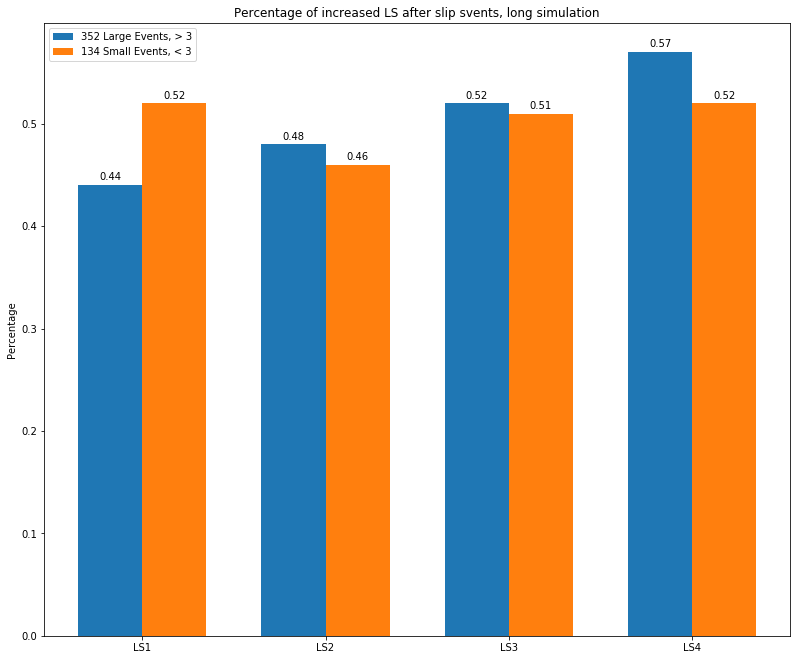

In [34]:
labels = ['LS1', 'LS2', 'LS3', 'LS4']
long_total = 486
long_small = 126
long_large = 360
ls_long_large = np.around(np.array([159, 174, 187, 207])/long_large,2)
ls_long_small = np.around(np.array([66, 58, 64, 65])/long_small,2)

x = np.arange(len(labels))  # the label locations
width = 0.35                # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ls_long_large, width, label='352 Large Events, > 3')
rects2 = ax.bar(x + width/2, ls_long_small, width, label='134 Small Events, < 3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Percentage of increased LS after slip svents, long simulation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.set_size_inches(12.5, 10.5)
plt.show()
fig.savefig(project_path + ref_path +"ls_grow_percentage_long.png" , dpi=200)

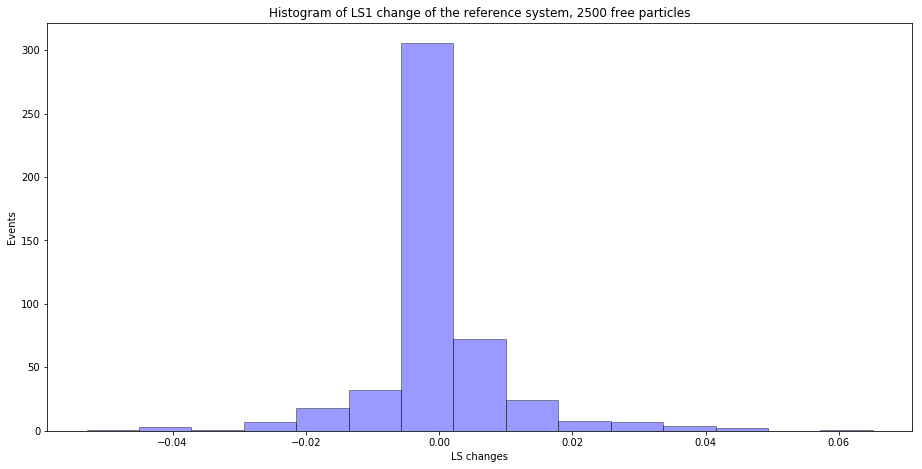

In [35]:
sns.distplot(ls_change_long[:,0], hist=True, kde=False, 
             bins=15,  color = 'blue',
             hist_kws={'edgecolor':'black'},)
            #kde_kws={"color": "R", "lw": 3, "label": "Gaussian Kernel Density Estimate"})

plt.title('Histogram of LS1 change of the reference system, 2500 free particles')
plt.xlabel('LS changes')
plt.ylabel('Events')
fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
fig.savefig(project_path + ref_path +"ls1_change_distribution.png" , dpi=200)

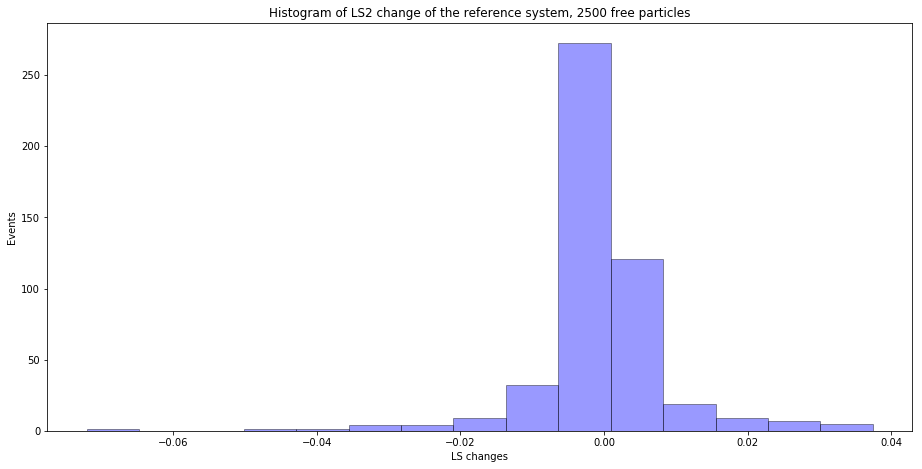

In [36]:
sns.distplot(ls_change_long[:,1], hist=True, kde=False, 
             bins=15,  color = 'blue',
             hist_kws={'edgecolor':'black'},)
            #kde_kws={"color": "R", "lw": 3, "label": "Gaussian Kernel Density Estimate"})

plt.title('Histogram of LS2 change of the reference system, 2500 free particles')
plt.xlabel('LS changes')
plt.ylabel('Events')
fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
fig.savefig(project_path + ref_path +"ls2_change_distribution.png" , dpi=200)

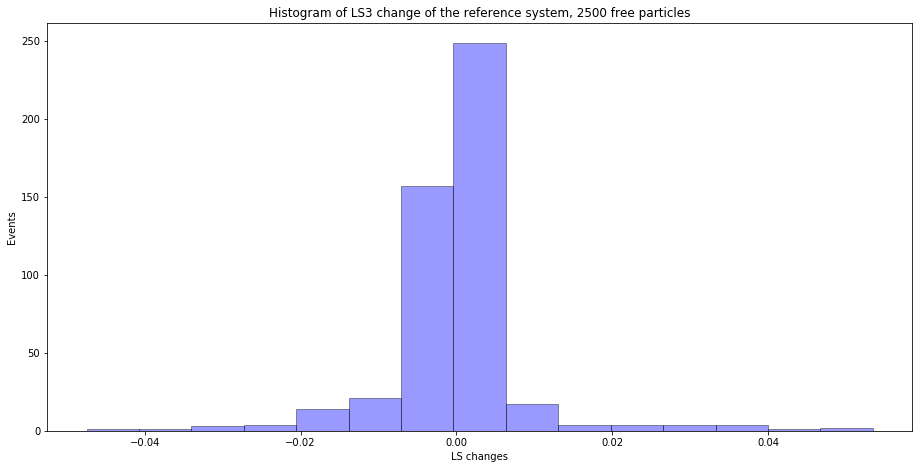

In [37]:
sns.distplot(ls_change_long[:,2], hist=True, kde=False, 
             bins=15,  color = 'blue',
             hist_kws={'edgecolor':'black'},)
            #kde_kws={"color": "R", "lw": 3, "label": "Gaussian Kernel Density Estimate"})

plt.title('Histogram of LS3 change of the reference system, 2500 free particles')
plt.xlabel('LS changes')
plt.ylabel('Events')
fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
fig.savefig(project_path + ref_path +"ls3_change_distribution.png" , dpi=200)

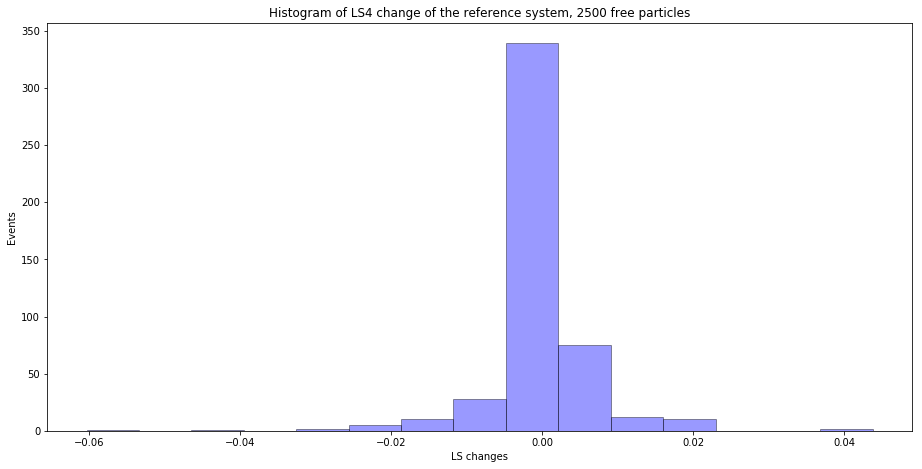

In [38]:
sns.distplot(ls_change_long[:,3], hist=True, kde=False, 
             bins=15,  color = 'blue',
             hist_kws={'edgecolor':'black'},)
            #kde_kws={"color": "R", "lw": 3, "label": "Gaussian Kernel Density Estimate"})

plt.title('Histogram of LS4 change of the reference system, 2500 free particles')
plt.xlabel('LS changes')
plt.ylabel('Events')
fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
fig.savefig(project_path + ref_path +"ls4_change_distribution.png" , dpi=200)